In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df= pd.read_csv("headbrain.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
x= df["Head Size(cm^3)"].values
y= df["Brain Weight(grams)"].values

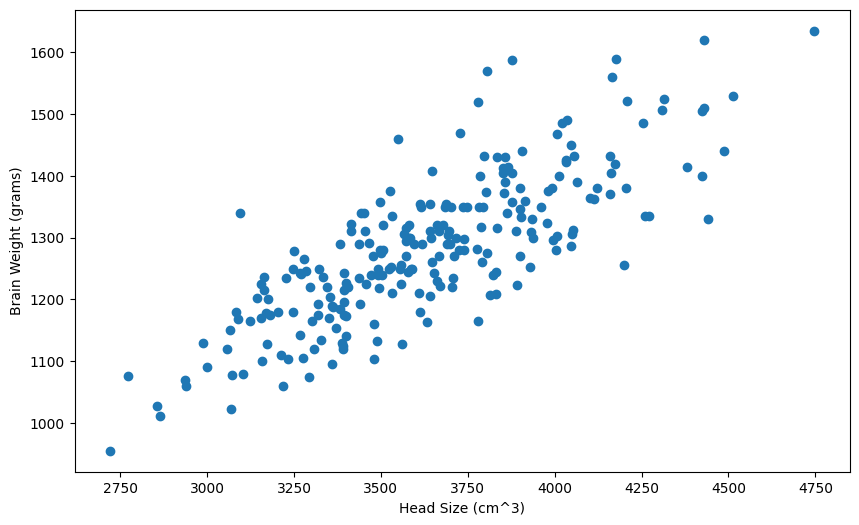

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.show()

In [10]:
mean_x= np.mean(x)
mean_y=np.mean(y)

In [11]:
numer=0
denom=0
n=len(x)
for i in range(n):
    numer+=(y[i]-mean_y)*(x[i]-mean_x)
    denom+=(x[i]-mean_x)**2
slope = numer/denom
intercept= mean_y-(slope*mean_x)
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.26342933948939945
Intercept: 325.57342104944223


In [19]:
predictions= []
for i in range(n):
    y_pred= slope*x[i]+ intercept
    predictions.append(y_pred)
print(predictions[:5])

[array([325.80630974]), array([325.70572054]), array([325.77368973]), array([325.71078899]), array([325.76277307])]


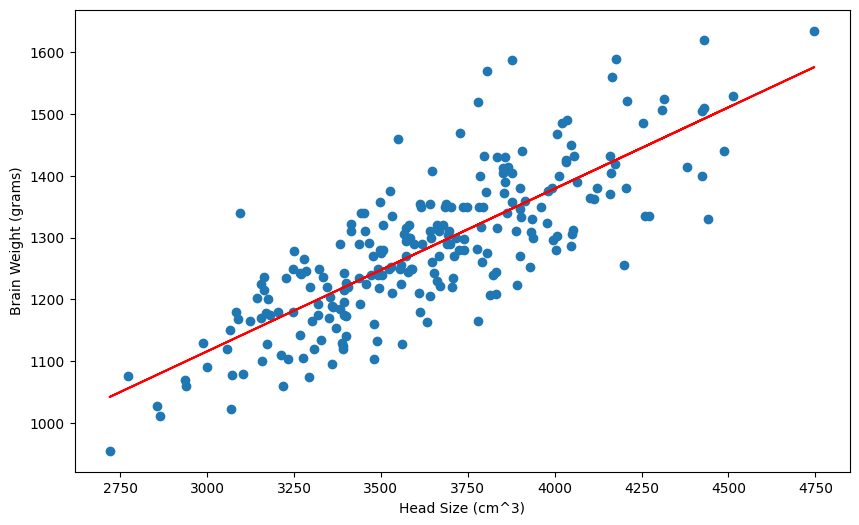

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.plot(x,predictions, color="red")
plt.show()

In [14]:
#MSE - Mean Squared Error
error=0
for i in range(n):
    error+=(predictions[i]-y[i])**2

mse= error/n
print("Mean Squared Error:", mse)

Mean Squared Error: 5201.38402800233


In [15]:
#RMSE
np.sqrt(mse)

np.float64(72.1206213783709)

Gradient Descent based slope and Intercept

In [4]:
from sklearn.preprocessing import MinMaxScaler


In [16]:
x= np.reshape(x,(-1,1)) #making our data 2d so that we can pass it to the minmax scaler
y= np.reshape(y,(-1,1))
x.shape

(237, 1)

In [45]:
minmax = MinMaxScaler()
scale_x= minmax.fit_transform(x)
scale_y= minmax.fit_transform(y)
print(scale_x[:5])

[[0.88406512]
 [0.50222003]
 [0.7602368 ]
 [0.52146029]
 [0.71879625]]


In [57]:
scale_y.shape

(237, 1)

In [46]:
def gradientDescent(epochs,alpha):
    slope, inter=0,0
    for i in range(epochs):
        y_pred = scale_x*slope+ inter # y=mx+c
        loss= y_pred-scale_y
        gradSlope = (2/n)*np.dot(loss.T,scale_x)
        gradInter= (2/n)*sum(loss)
        slope= slope-gradSlope*alpha
        inter= inter- gradInter*alpha
    return slope,inter

In [62]:
epochs=5000
alpha=0.1
slope,inter= gradientDescent(epochs,alpha)
print(slope,inter)

[[0.78525187]] [0.12809004]


In [63]:
predictions= []
for i in range(n):
    y_pred= slope[0][0]*scale_x[i] + inter[0]
    predictions.append(y_pred)
# print(predictions[:5])

In [59]:
scale_x.shape

(237, 1)

In [60]:
len(predictions)

237

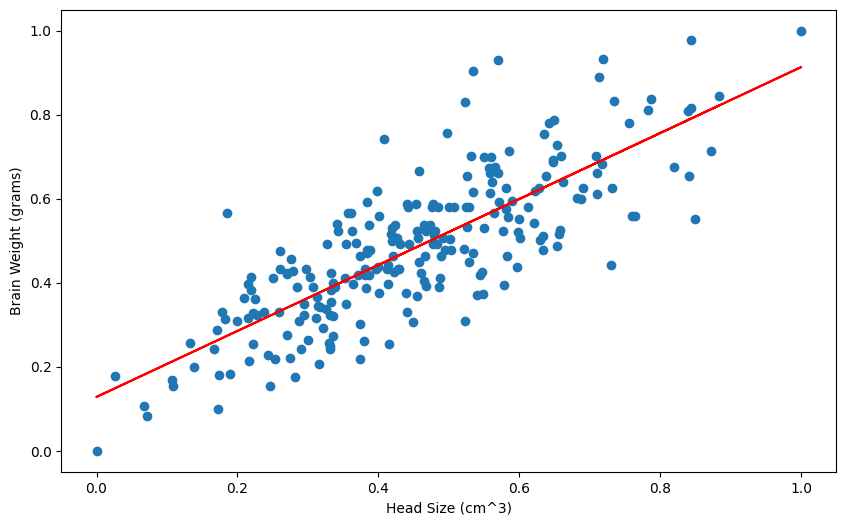

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(scale_x,scale_y)
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.plot(scale_x,predictions, color="red")
plt.show()